In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [28]:
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style("ticks")


In [3]:
class FunctionResourceCharacterization:
    cpu: float
    blkio: float
    gpu: float
    net: float
    ram: float

    def __init__(self, cpu: float, blkio: float, gpu: float, net: float, ram: float):
        self.cpu = cpu
        self.blkio = blkio
        self.gpu = gpu
        self.net = net
        self.ram = ram

    def __len__(self):
        return 5

    def __delitem__(self, key):
        self.__delattr__(key)

    def __getitem__(self, key):
        return self.__getattribute__(key)

    def __setitem__(self, key, value):
        self.__setattr__(key, value)


# python-pi was made with req=10000, except xeongpu - this one was req=2000, due to the inexplicable slow response
# RAM is in % relative to the available memory on the host
ai_resources_per_node_image = {
    ('rockpi', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.26066751860455545, 0.0, 0,
                                                                             867.0644652888737, 0.02850091195999672),
    ('rockpi', 'faas-workloads/fio'): FunctionResourceCharacterization(0.029841064731323804, 4770376.648598975, 0,
                                                                       56.153155728656486, 0.28409994931238014),
    ('rockpi', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.470676860647695, 0.0, 0,
                                                                                        6595019.673450895,
                                                                                        0.15783981610514522),
    ('rockpi', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.16995227926443168, 0.0, 0,
                                                                                           95857.20685534734,
                                                                                           0.027038749077793266),
    ('rockpi', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.3433166487566248, 0.0,
                                                                                              0, 21192217.072344374,
                                                                                              0.03577910586933355),
    ('rockpi', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.1621359802529322, 0.0, 0,
                                                                                        3210842.724971482,
                                                                                        0.04184853167040104),
    ('tx2', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.3707047087672767, 0.0, 0.0,
                                                                          1810.5183292303982, 0.02515170415577445),
    ('tx2', 'faas-workloads/fio'): FunctionResourceCharacterization(0.12237677348449455, 30368386.89545316, 0.0,
                                                                    273.162570864271, 0.0996017719111659),
    ('tx2', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.6437372515048979, 0.0, 0.0,
                                                                                     14922976.382232904,
                                                                                     0.0892017810225266),
    ('tx2', 'faas-workloads/resnet-inference-gpu'): FunctionResourceCharacterization(0.5056727639364579, 0.0,
                                                                                     0.040202020202020204,
                                                                                     26959145.991050187,
                                                                                     0.42826641528347176),
    ('tx2', 'faas-workloads/speech-inference-gpu'): FunctionResourceCharacterization(0.24903698450299938, 0.0,
                                                                                     0.20655083333333335,
                                                                                     153013.5103681544,
                                                                                     0.19720434172903806),
    ('tx2', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.2705111164968124, 0.0, 0.0,
                                                                                        107222.56215796615,
                                                                                        0.020603045265239994),
    ('tx2', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.4896754723162535, 0.0, 0.0,
                                                                                           32551253.14794654,
                                                                                           0.029972260876479768),
    ('tx2', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.25188175990905504, 0.0, 0.0,
                                                                                     3878847.7339153336,
                                                                                     0.03050730938205095),
    ('tx2', 'faas-workloads/resnet-training-gpu'): FunctionResourceCharacterization(0.1788531851032265,
                                                                                    205334.00746910932,
                                                                                    0.7416627493881441,
                                                                                    1140886.153462762,
                                                                                    0.7747928186897689),
    ('tx2', 'faas-workloads/tf-gpu'): FunctionResourceCharacterization(0.0592452081327536, 0.0, 0.5743916666666666,
                                                                       1928.7868725481815, 0.2680824975730648),
    ('nano', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.4176991404969024, 0.0, 0.0,
                                                                           1178.4081169827807, 0.029120248518202826),
    ('nano', 'faas-workloads/fio'): FunctionResourceCharacterization(0.056646811885180295, 6683200.396891743, 0.0,
                                                                     62.77604036087152, 0.28360788708505186),
    ('nano', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.6173617438212513, 0.0, 0.0,
                                                                                      11929148.603204524,
                                                                                      0.16747364790626862),
    ('nano', 'faas-workloads/resnet-inference-gpu'): FunctionResourceCharacterization(0.3093157264863544,
                                                                                      303260.485031949,
                                                                                      0.1754387755102041,
                                                                                      14102879.228728207,
                                                                                      0.7423479015527812),
    ('nano', 'faas-workloads/speech-inference-gpu'): FunctionResourceCharacterization(0.18332872406064035,
                                                                                      286.01805267962396,
                                                                                      0.3609263333333333,
                                                                                      131431.49378338552,
                                                                                      0.3460782388908323),
    ('nano', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.25193417112173455, 0.0, 0.0,
                                                                                         93917.27007907239,
                                                                                         0.05844299798485439),
    ('nano', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.4648267977623851, 0.0,
                                                                                            0.0, 22159311.443426955,
                                                                                            0.06825314958884132),
    ('nano', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.23927812156043296, 0.0, 0.0,
                                                                                      3129712.5539431805,
                                                                                      0.07892593510475636),
    ('nano', 'faas-workloads/resnet-training-gpu'): FunctionResourceCharacterization(0.09477461470306936,
                                                                                     16690880.000560522,
                                                                                     0.614075023966652,
                                                                                     445353.4862114798,
                                                                                     0.8325312889088585),
    ('nano', 'faas-workloads/tf-gpu'): FunctionResourceCharacterization(0.06779100962131734, 0.0, 0.076765,
                                                                        17660.26742032455, 0.45875627577440226),
    ('nx', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.2736460766287605, 0.0, 0.0,
                                                                         1007.5886562769618, 0.014838573803879939),
    ('nx', 'faas-workloads/fio'): FunctionResourceCharacterization(0.030209142703148596, 9512751.066545032, 0.0,
                                                                   88.20910117155238, 0.1256662577911986),
    ('nx', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.32085762427108155, 0.0, 0.0,
                                                                                    16688952.186395567,
                                                                                    0.08214067642582418),
    ('nx', 'faas-workloads/resnet-inference-gpu'): FunctionResourceCharacterization(0.32610813751087114, 0.0,
                                                                                    0.036719999999999996,
                                                                                    26647216.18205711,
                                                                                    0.40646431091783125),
    ('nx', 'faas-workloads/speech-inference-gpu'): FunctionResourceCharacterization(0.1528258733857839, 0.0,
                                                                                    0.20816166666666663,
                                                                                    280619.2978975475,
                                                                                    0.12338208555916783),
    ('nx', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.16536599515876219, 0.0, 0.0,
                                                                                       137404.4579713001,
                                                                                       0.012394685441082152),
    ('nx', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.2725498346539076, 0.0, 0.0,
                                                                                          26977091.707812138,
                                                                                          0.015809704470836124),
    ('nx', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.15608878455355574, 0.0, 0.0,
                                                                                    4179408.7300580596,
                                                                                    0.019304396503614804),
    ('nx', 'faas-workloads/resnet-training-gpu'): FunctionResourceCharacterization(0.13539556486740242,
                                                                                   33036.85715551058,
                                                                                   0.6788861615628918,
                                                                                   5720992.820388119,
                                                                                   0.7181088281389225),
    ('nx', 'faas-workloads/tf-gpu'): FunctionResourceCharacterization(0.021658557716071877, 0.0, 0.5042683333333333,
                                                                      3066.2566823401226, 0.28548891539449794),
    ('rpi4', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.2589641851156356, 98.77116879952688, 0,
                                                                           37.282525984785686, 0.08304058474398496),
    ('rpi4', 'faas-workloads/fio'): FunctionResourceCharacterization(0.05734476965774494, 2212988.4169104667, 0,
                                                                     51.35463515857114, 0.5179107225468366),
    ('rpi4', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.6178520697554751,
                                                                                      3493.9240103304014, 0,
                                                                                      2788183.4486825834,
                                                                                      0.31247270825065837),
    ('rpi4', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.25404465742300353,
                                                                                         181.77953125389715, 0,
                                                                                         55027.72837537202,
                                                                                         0.08083058179679631),
    ('rpi4', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.3859871775412303,
                                                                                            729.0928823356834, 0,
                                                                                            8323463.029890781,
                                                                                            0.09021695908542475),
    ('rpi4', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.25124224587596994,
                                                                                      55.58123936730799, 0,
                                                                                      1346582.9711275853,
                                                                                      0.087515099187977),
    ('nuc', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.16327930662578122, 5369.999178396372, 0,
                                                                          4335.164300377482, 0.0072464424825868495),
    ('nuc', 'faas-workloads/fio'): FunctionResourceCharacterization(0.08518180777178165, 443474371.93204427, 0,
                                                                    1058.6437760590277, 0.033604757826587416),
    ('nuc', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.439330704824215,
                                                                                     35006.21431055329, 0,
                                                                                     55698244.64783099,
                                                                                     0.04623383643545283),
    ('nuc', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.12473702325767871, 0.0, 0,
                                                                                        377237.4841574662,
                                                                                        0.014440833755648879),
    ('nuc', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.21125373689115415,
                                                                                           15348.224036911932, 0,
                                                                                           38885237.05583308,
                                                                                           0.028988394596170506),
    ('nuc', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.10658335529885898,
                                                                                     1695.0086579905637, 0,
                                                                                     10642157.205724549,
                                                                                     0.017354641403357837),
    ('nuc', 'faas-workloads/resnet-training-cpu'): FunctionResourceCharacterization(0.8778859671650178,
                                                                                    229621.9812613565, 0,
                                                                                    1416910.5880434313,
                                                                                    0.5770261788143544),
    ('xeongpu', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.25104879045872724, 0.0, 0.0,
                                                                              27.438777768693512, 0.004305198283637087),
    ('xeoncpu', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.25104879045872724, 0.0, 0.0,
                                                                              27.438777768693512, 0.004305198283637087),
    ('xeongpu', 'faas-workloads/fio'): FunctionResourceCharacterization(0.17225484698783156, 105923185.84862246, 0.0,
                                                                        1033.0406424383216, 0.03229357762155556),
    ('xeoncpu', 'faas-workloads/fio'): FunctionResourceCharacterization(0.17225484698783156, 105923185.84862246, 0.0,
                                                                        1033.0406424383216, 0.03229357762155556),
    ('xeongpu', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.7157778904909182, 0.0, 0.0,
                                                                                         63570485.920656934,
                                                                                         0.03538363445374544),
    ('xeoncpu', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.7157778904909182, 0.0, 0.0,
                                                                                         63570485.920656934,
                                                                                         0.03538363445374544),
    ('xeongpu', 'faas-workloads/resnet-inference-gpu'): FunctionResourceCharacterization(0.37430461089807654, 0.0,
                                                                                         0.005, 57658305.02172596,
                                                                                         0.1259818535384398),
    ('xeongpu', 'faas-workloads/speech-inference-gpu'): FunctionResourceCharacterization(0.28122237682203244,
                                                                                         1847.2475203267718,
                                                                                         0.08349999999999999,
                                                                                         513443.86782282026,
                                                                                         0.044492129917988656),
    ('xeongpu', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.2532600877648794, 0.0,
                                                                                            0.0, 346503.29718918464,
                                                                                            0.0037081284644138713),
    ('xeoncpu', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.2532600877648794, 0.0,
                                                                                            0.0, 346503.29718918464,
                                                                                            0.0037081284644138713),
    ('xeongpu', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.41735802291597573, 0.0,
                                                                                               0.0, 33404170.874672726,
                                                                                               0.018836604051280674),
    ('xeoncpu', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.41735802291597573, 0.0,
                                                                                               0.0, 33404170.874672726,
                                                                                               0.018836604051280674),
    ('xeongpu', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.20870127200306265,
                                                                                         526.0311884296032, 0.0,
                                                                                         10226057.56153548,
                                                                                         0.07645132585138097),
    ('xeoncpu', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.20870127200306265,
                                                                                         526.0311884296032, 0.0,
                                                                                         10226057.56153548,
                                                                                         0.07645132585138097),
    ('xeongpu', 'faas-workloads/resnet-training-gpu'): FunctionResourceCharacterization(0.24106662185734815,
                                                                                        12032.826369487575,
                                                                                        0.6002495136081041,
                                                                                        15750963.289374296,
                                                                                        0.2848634727401207),
    ('xeongpu', 'faas-workloads/tf-gpu'): FunctionResourceCharacterization(0.24361773481853854, 0.0, 0.0565,
                                                                           9723.279356785817, 0.06644044468790623),
    ('coral', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.35645089819143094, 735752.0267285869, 0,
                                                                            204.01414233371494, 0.5667724395036686),
    ('coral', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.3790727085613829,
                                                                                       22642005.729414783, 0,
                                                                                       5099707.807677874,
                                                                                       0.5559619094971713),
    ('coral', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.2501691236630753, 0.0, 0,
                                                                                          50410.417657074395,
                                                                                          0.08785061064186064),
    ('coral', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.27407894105734276,
                                                                                             4642.389351207664, 0,
                                                                                             15975138.88173663,
                                                                                             0.12149107411691996),
    ('coral', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.24167246170046083,
                                                                                       2160.2060951038548, 0,
                                                                                       2124329.7587075434,
                                                                                       0.14842207833369112),
    ('rpi3', 'faas-workloads/python-pi'): FunctionResourceCharacterization(0.2632196988891948, 0.0, 0,
                                                                           14.415714537708084, 0.06673025668128908),
    ('rpi3', 'faas-workloads/fio'): FunctionResourceCharacterization(0.06289025503339646, 2225277.087690125, 0,
                                                                     50.797641637527974, 0.6536923071250603),
    ('rpi3', 'faas-workloads/resnet-inference-cpu'): FunctionResourceCharacterization(0.5448381974407112,
                                                                                      2615.734632324097, 0,
                                                                                      2062539.5723288062,
                                                                                      0.36519032690251113),
    ('rpi3', 'faas-workloads/speech-inference-tflite'): FunctionResourceCharacterization(0.25443755203171387,
                                                                                         64.46054557083016, 0,
                                                                                         22390.46618188261,
                                                                                         0.12244167296212195),
    ('rpi3', 'faas-workloads/mobilenet-inference-tflite'): FunctionResourceCharacterization(0.3035938910644207,
                                                                                            60.130661576483014, 0,
                                                                                            5175658.184667777,
                                                                                            0.13787648928091437),
    ('rpi3', 'faas-workloads/resnet-preprocessing'): FunctionResourceCharacterization(0.23920668104893472,
                                                                                      45.88347111936155, 0,
                                                                                      610213.8222734069,
                                                                                      0.12884635421827495),
}


In [10]:
from srds import ParameterizedDistribution as PDist

# python-pi was made with req=10000, except xeongpu - this one was req=2000, due to the inexplicable slow response
ai_execution_time_distributions = {
    ('rpi3', 'faas-workloads/python-pi'): (1.909987211227417, 2.203219413757324, PDist.lognorm(
        ((1.5561351906586467,), 1.9092154433285176, 0.03832589013392289))),
    ('rpi4', 'faas-workloads/python-pi'): (1.6961045265197754, 1.7755048274993896, PDist.lognorm(
        ((2.0378973843923234,), 1.6960468751471511, 0.017276257000211737))),
    ('xeongpu', 'faas-workloads/python-pi'): (2.9558749198913574, 3.0182230472564697, PDist.lognorm(
        ((0.33924794244178996,), 2.9421626090307855, 0.03231526504686262))),
    ('xeoncpu', 'faas-workloads/python-pi'): (2.9558749198913574, 3.0182230472564697, PDist.lognorm(
        ((0.33924794244178996,), 2.9421626090307855, 0.03231526504686262))),
    ('nx', 'faas-workloads/python-pi'): (1.280782699584961, 1.3314659595489502, PDist.lognorm(
        ((0.3204243885534094,), 1.2658584067446368, 0.029294830565182426))),
    ('tx2', 'faas-workloads/python-pi'): (0.9472050666809082, 0.973700761795044, PDist.lognorm(
        ((0.34123939468038056,), 0.9407173896320605, 0.015806120791955418))),
    ('nano', 'faas-workloads/python-pi'): (1.300102949142456, 1.330549716949463, PDist.lognorm(
        ((0.7189304098250027,), 1.2990304403954829, 0.007775231273223189))),
    ('rockpi', 'faas-workloads/python-pi'): (0.9023468494415283, 0.96213698387146, PDist.lognorm(
        ((1.0176060175917105,), 0.9019280787708568, 0.008452707474514693))),
    ('coral', 'faas-workloads/python-pi'): (1.6157212257385254, 1.6432366371154785, PDist.lognorm(
        ((2.0685603472046896,), 1.6156998209501152, 0.0066422665082161245))),
    ('nuc', 'faas-workloads/python-pi'): (0.4291870594024658, 0.44258952140808105, PDist.lognorm(
        ((0.7668200520309387,), 0.42879374181896945, 0.002728658224322277))),
    ('xeongpu', 'faas-workloads/fio'): (1.1168184280395508, 1.1966462135314941, PDist.lognorm(
        ((0.547478970870047,), 1.1083822085143797, 0.030433853662662387))),
    ('xeoncpu', 'faas-workloads/fio'): (1.1168184280395508, 1.1966462135314941, PDist.lognorm(
        ((0.547478970870047,), 1.1083822085143797, 0.030433853662662387))),
    ('tx2', 'faas-workloads/fio'): (4.199761152267456, 4.508903503417969,
                                    PDist.lognorm(((1.3756415929126355,), 4.198414125199262, 0.05290299893253018))),
    ('nano', 'faas-workloads/fio'): (17.634405612945557, 21.379503965377808,
                                     PDist.lognorm(((0.018126581624838864,), -20.429942918329502, 40.06238600923392))),
    ('nx', 'faas-workloads/fio'): (13.390366792678833, 14.499114036560059,
                                   PDist.lognorm(((1.2593738429645396,), 13.379751217809101, 0.21565860828690103))),
    ('rpi4', 'faas-workloads/fio'): (23.43714690208435, 33.209991216659546,
                                     PDist.lognorm(((0.009384653682239431,), -156.36010377296788, 184.15597782535895))),
    ('nuc', 'faas-workloads/fio'): (1.0893218517303467, 1.3713059425354004,
                                    PDist.lognorm(((1.1299582738854954,), 1.088922789515207, 0.014824511843598303))),
    ('rockpi', 'faas-workloads/fio'): (21.46393871307373, 23.428807735443115,
                                       PDist.lognorm(((0.6243415046474259,), 21.333338896210595, 0.544673148530165))),
    ('rpi3', 'faas-workloads/fio'): (23.947848558425903, 41.15871047973633,
                                     PDist.lognorm(((1.4725990652984735,), 23.901942788072812, 2.061301749245649))),
    ('tx2', 'faas-workloads/resnet-inference-cpu'): (0.6948370933532715, 1.1444413661956787, PDist.lognorm(
        ((0.8501001928589622,), 0.6917307756410416, 0.03637932277634568))),
    ('nano', 'faas-workloads/resnet-inference-cpu'): (0.8841347694396973, 1.3210082054138184, PDist.lognorm(
        ((0.6418412926282235,), 0.8774528367440888, 0.040203191672859434))),
    ('nx', 'faas-workloads/resnet-inference-cpu'): (0.4536397457122803, 0.5972743034362793, PDist.lognorm(
        ((0.18877396743289954,), 0.36851360580284376, 0.13846196638192304))),
    ('rpi3', 'faas-workloads/resnet-inference-cpu'): (
        4.425604581832886, 5.861693859100342,
        PDist.lognorm(((0.480548812316585,), 4.109022481450841, 0.8837760799244128))),
    ('rpi4', 'faas-workloads/resnet-inference-cpu'): (2.772036075592041, 3.4497311115264893, PDist.lognorm(
        ((0.34259117242902337,), 2.6647105511948013, 0.22908468382108765))),
    ('rockpi', 'faas-workloads/resnet-inference-cpu'): (1.1331660747528076, 1.9165077209472656, PDist.lognorm(
        ((0.1701387081476361,), 0.6767214411001377, 0.6915067219689892))),
    ('coral', 'faas-workloads/resnet-inference-cpu'): (1.4113075733184814, 3.642624855041504, PDist.lognorm(
        ((0.5091677176621551,), 1.1979548997737532, 0.8673575947926709))),
    ('xeongpu', 'faas-workloads/resnet-inference-cpu'): (0.1462233066558838, 0.3092348575592041, PDist.lognorm(
        ((1.250516246833203,), 0.14569116166838314, 0.015314005461484962))),
    ('xeoncpu', 'faas-workloads/resnet-inference-cpu'): (0.1462233066558838, 0.3092348575592041, PDist.lognorm(
        ((1.250516246833203,), 0.14569116166838314, 0.015314005461484962))),
    ('nuc', 'faas-workloads/resnet-inference-cpu'): (0.1407608985900879, 0.30925583839416504, PDist.lognorm(
        ((0.5323003236246481,), 0.1365508992652769, 0.017830791693920288))),
    ('tx2', 'faas-workloads/resnet-inference-gpu'): (0.37734198570251465, 0.8128652572631836, PDist.lognorm(
        ((0.6929061829413992,), 0.37615968175516823, 0.012486450479634974))),
    ('nano', 'faas-workloads/resnet-inference-gpu'): (0.6658952236175537, 1.843451738357544, PDist.lognorm(
        ((0.9361873291014332,), 0.6630484909941858, 0.04025457729806213))),
    ('nx', 'faas-workloads/resnet-inference-gpu'): (0.36667823791503906, 0.7085371017456055, PDist.lognorm(
        ((0.6224342740828939,), 0.36467625323618025, 0.017596239652913598))),
    ('xeongpu', 'faas-workloads/resnet-inference-gpu'): (0.11229228973388672, 0.3232553005218506, PDist.lognorm(
        ((0.8643766901903747,), 0.11095425513074908, 0.011781111260569395))),
    ('tx2', 'faas-workloads/speech-inference-gpu'): (3.1765449047088623, 3.380650758743286, PDist.lognorm(
        ((0.0025414734025261208,), -9.223028569212083, 12.529918252908715))),
    ('nano', 'faas-workloads/speech-inference-gpu'): (4.365040063858032, 4.694480657577515, PDist.lognorm(
        ((0.013090577085142809,), -1.5754467886453463, 6.119082935261158))),
    ('nx', 'faas-workloads/speech-inference-gpu'): (1.5870838165283203, 1.835263967514038, PDist.lognorm(
        ((0.3409027343356294,), 1.5597613802886927, 0.08327712822735661))),
    ('xeongpu', 'faas-workloads/speech-inference-gpu'): (0.71323561668396, 0.7919847965240479, PDist.lognorm(
        ((0.008946086677742587,), -1.307494985069547, 2.055274866615258))),
    ('tx2', 'faas-workloads/speech-inference-tflite'): (3.3613061904907227, 3.548738956451416, PDist.lognorm(
        ((0.14837049015268372,), 3.1825127376318507, 0.2542879539682151))),
    ('nano', 'faas-workloads/speech-inference-tflite'): (3.811147451400757, 4.026976585388184, PDist.lognorm(
        ((0.338573110489491,), 3.756233885601591, 0.12222610657663688))),
    ('nx', 'faas-workloads/speech-inference-tflite'): (2.511276960372925, 2.8111839294433594, PDist.lognorm(
        ((0.002128915799735443,), -20.11768232046066, 22.801283873362763))),
    ('rpi3', 'faas-workloads/speech-inference-tflite'): (15.982834100723267, 17.307713270187378, PDist.lognorm(
        ((0.2990468329948087,), 15.530564025376192, 0.9842449631740879))),
    ('rpi4', 'faas-workloads/speech-inference-tflite'): (6.625596523284912, 6.853733539581299, PDist.lognorm(
        ((0.013426059217138844,), 3.1072194637679287, 3.6418182858862655))),
    ('rockpi', 'faas-workloads/speech-inference-tflite'): (3.65761399269104, 3.972121000289917, PDist.lognorm(
        ((0.0038685069906899405,), -10.314587245344875, 14.13031293229767))),
    ('xeongpu', 'faas-workloads/speech-inference-tflite'): (1.0549635887145996, 1.1173889636993408, PDist.lognorm(
        ((0.3862192323604978,), 1.040493169321096, 0.03485261244686297))),
    ('xeoncpu', 'faas-workloads/speech-inference-tflite'): (1.0549635887145996, 1.1173889636993408, PDist.lognorm(
        ((0.3862192323604978,), 1.040493169321096, 0.03485261244686297))),
    ('coral', 'faas-workloads/speech-inference-tflite'): (
        7.140416860580444, 7.32071328163147,
        PDist.lognorm(((0.309383084086699,), 7.075666750430653, 0.13197037140529588))),
    ('nuc', 'faas-workloads/speech-inference-tflite'): (1.0520174503326416, 1.086385726928711, PDist.lognorm(
        ((0.7164044762741202,), 1.0506221929357897, 0.009455495987769815))),
    ('tx2', 'faas-workloads/mobilenet-inference-tflite'): (0.3218262195587158, 0.3404886722564697, PDist.lognorm(
        ((2.533344881031916,), 0.32182288558187044, 0.0042115822256853265))),
    ('nano', 'faas-workloads/mobilenet-inference-tflite'): (0.4417688846588135, 0.45539116859436035, PDist.lognorm(
        ((2.23565414673075,), 0.44176341795738083, 0.002910299253376422))),
    ('nx', 'faas-workloads/mobilenet-inference-tflite'): (0.3183910846710205, 0.35461950302124023, PDist.lognorm(
        ((0.28469241141582113,), 0.3091602236680885, 0.022375250553106865))),
    ('rpi3', 'faas-workloads/mobilenet-inference-tflite'): (
        1.96744704246521, 2.3119328022003174,
        PDist.lognorm(((0.402693282261331,), 1.9085815209567794, 0.151517311826892))),
    ('rpi4', 'faas-workloads/mobilenet-inference-tflite'): (1.2563717365264893, 1.3392689228057861, PDist.lognorm(
        ((0.492750480136671,), 1.2433487914150247, 0.03528135900856))),
    ('rockpi', 'faas-workloads/mobilenet-inference-tflite'): (0.37113523483276367, 0.6942205429077148, PDist.lognorm(
        ((0.15694893846245875,), 0.09924997518597733, 0.411072865085738))),
    ('coral', 'faas-workloads/mobilenet-inference-tflite'): (0.6539947986602783, 0.7023055553436279, PDist.lognorm(
        ((0.48206879938366154,), 0.6520314724778564, 0.011274621134062308))),
    ('xeongpu', 'faas-workloads/mobilenet-inference-tflite'): (0.26646852493286133, 0.3171541690826416, PDist.lognorm(
        ((0.5365853735187458,), 0.2629530210923786, 0.017526290870830248))),
    ('xeoncpu', 'faas-workloads/mobilenet-inference-tflite'): (0.26646852493286133, 0.3171541690826416, PDist.lognorm(
        ((0.5365853735187458,), 0.2629530210923786, 0.017526290870830248))),
    ('nuc', 'faas-workloads/mobilenet-inference-tflite'): (0.2647244930267334, 0.308530330657959, PDist.lognorm(
        ((0.213495159031093,), 0.24391558677812142, 0.03560607539324892))),
    ('tx2', 'faas-workloads/resnet-preprocessing'): (6.223581314086914, 6.590674638748169, PDist.lognorm(
        ((0.25278510391411824,), 6.076221026439702, 0.30137273301561684))),
    ('nano', 'faas-workloads/resnet-preprocessing'): (7.8491973876953125, 9.16739535331726, PDist.lognorm(
        ((0.749277313721395,), 7.838747661086966, 0.07855304435000107))),
    ('nx', 'faas-workloads/resnet-preprocessing'): (5.809688329696655, 6.8749473094940186, PDist.lognorm(
        ((0.2463529274947488,), 5.5980717469353, 0.46803545566088733))),
    ('rpi3', 'faas-workloads/resnet-preprocessing'): (
        29.41605019569397, 37.47779178619385,
        PDist.lognorm(((0.5964107022199113,), 29.14633433496855, 1.104606368132186))),
    ('rpi4', 'faas-workloads/resnet-preprocessing'): (18.986950397491455, 20.01262331008911, PDist.lognorm(
        ((0.0070302901079828135,), -17.918047627124665, 37.41970089494406))),
    ('rockpi', 'faas-workloads/resnet-preprocessing'): (7.352227449417114, 8.141456127166748, PDist.lognorm(
        ((0.1897235590296447,), 6.987563394961493, 0.6473314423433307))),
    ('coral', 'faas-workloads/resnet-preprocessing'): (10.412590026855469, 10.664041996002197, PDist.lognorm(
        ((0.14905146429856836,), 10.169515023380942, 0.34020180035649983))),
    ('nuc', 'faas-workloads/resnet-preprocessing'): (2.467944383621216, 2.5904436111450195, PDist.lognorm(
        ((0.21058554606390106,), 2.4047184516326245, 0.11860319137639974))),
    ('xeongpu', 'faas-workloads/resnet-preprocessing'): (2.5816872119903564, 2.73801851272583, PDist.lognorm(
        ((0.0046462923279184595,), -3.733773151864244, 6.398168798011675))),
    ('xeoncpu', 'faas-workloads/resnet-preprocessing'): (2.5816872119903564, 2.73801851272583, PDist.lognorm(
        ((0.0046462923279184595,), -3.733773151864244, 6.398168798011675))),
    ('xeongpu', 'faas-workloads/resnet-training-gpu'): (
        31.53477692604065, 33.14484930038452,
        PDist.lognorm(((0.438998700689963,), 31.14152001046308, 0.8976046157724586))),
    ('nx', 'faas-workloads/resnet-training-gpu'): (139.35805344581604, 144.51621437072754, PDist.lognorm(
        ((0.005832169839304721,), -51.585196234614244, 193.5819207725017))),
    ('tx2', 'faas-workloads/resnet-training-gpu'): (225.4308431148529, 234.05239510536194, PDist.lognorm(
        ((0.6361116541813518,), 224.70438940974208, 2.810213847353603))),
    ('nano', 'faas-workloads/resnet-training-gpu'): (
        475.3121247291565, 3758.72234249115,
        PDist.lognorm(((1.3586403533926732,), 468.0979297934913, 139.09890480835355))),
    ('nuc', 'faas-workloads/resnet-training-cpu'): (196.37506127357483, 202.84338760375977,
                                                    PDist.lognorm(
                                                        ((0.4738306908521043,), 196.1424565418967, 1.153017771389426))),
    ('nx', 'faas-workloads/tf-gpu'): (1.158355951309204, 1.208902359008789,
                                      PDist.lognorm(((0.6352649591792237,), 1.1545879504235148, 0.015347490963527024))),
    ('xeongpu', 'faas-workloads/tf-gpu'): (0.36005401611328125, 0.37538766860961914, PDist.lognorm(
        ((2.5307323293089565,), 0.3600503383478125, 0.004224701754546815))),
    ('tx2', 'faas-workloads/tf-gpu'): (1.8746130466461182, 2.1380443572998047,
                                       PDist.lognorm(((0.6207149378318482,), 1.873085227543282, 0.011399394443365792))),
    ('nano', 'faas-workloads/tf-gpu'): (0.5251214504241943, 1.096886157989502, PDist.lognorm(
        ((1.4344624279117903,), 0.5247122204199652, 0.03296898373982664))),
}

ai_min_max_execution_times = {'faas-workloads/tf-gpu': (0.36531192779541016, 1.8881448245048522),
                              'faas-workloads/speech-inference-gpu': (0.747898964881897, 4.544314980506897),
                              'faas-workloads/resnet-training-gpu': (32.12711091739376, 847.171815255109),
                              'faas-workloads/speech-inference-tflite': (1.0626225304603576, 16.559413411617278),
                              'faas-workloads/resnet-preprocessing': (2.5259750509262084, 30.478582429331404),
                              'faas-workloads/mobilenet-inference-tflite': (0.2803403902053833, 2.0728497886657715),
                              'faas-workloads/python-pi': (0.24590346574783326, 71.5935873889923),
                              'faas-workloads/fio': (1.1227234315872192, 28.66214724727299),
                              'faas-workloads/resnet-inference-cpu': (0.15748303413391113, 5.095058534145355),
                              'faas-workloads/resnet-training-cpu': (197.44802653944336, 197.44802653944336),
                              'faas-workloads/resnet-inference-gpu': (0.12844885587692262, 0.7286638289081807),
                              'faas-workloads/mobilenet-inference-tpu': (0.5475386333465576, 0.5475386333465576)}

ai_mean_execution_times = {
    'faas-workloads/tf-gpu': {'nx': 1.1731165671348571, 'nano': 0.6205120253562927, 'xeongpu': 0.36531192779541016,
                              'tx2': 1.8881448245048522},
    'faas-workloads/speech-inference-gpu': {'nx': 1.6482071661949158, 'nano': 4.544314980506897,
                                            'xeongpu': 0.747898964881897, 'tx2': 3.3071153211593627},
    'faas-workloads/resnet-training-gpu': {'nx': 141.99886816077762, 'nano': 847.171815255109,
                                           'xeongpu': 32.12711091739376, 'tx2': 228.1172546479437},
    'faas-workloads/speech-inference-tflite': {'nx': 2.6837231802940367, 'nano': 3.8856320667266844,
                                               'xeoncpu': 1.0779976797103883, 'xeongpu': 1.0779976797103883,
                                               'tx2': 3.4396099495887755, 'rpi3': 16.559413411617278,
                                               'rpi4': 6.7493284320831295, 'nuc': 1.0626225304603576,
                                               'coral': 7.2140442943573, 'rockpi': 3.815823349952698},
    'faas-workloads/resnet-preprocessing': {'nx': 6.081014342308045, 'nano': 7.95175134897232,
                                            'xeoncpu': 2.6644398760795593, 'xeongpu': 2.6644398760795593,
                                            'tx2': 6.387359216213226, 'rpi3': 30.478582429331404,
                                            'rpi4': 19.502971405982972, 'nuc': 2.5259750509262084,
                                            'coral': 10.51350971698761, 'rockpi': 7.646788821220398},
    'faas-workloads/mobilenet-inference-tflite': {'nx': 0.33246784210205077, 'nano': 0.4461205530166626,
                                                  'xeoncpu': 0.2831557750701904, 'xeongpu': 0.2831557750701904,
                                                  'tx2': 0.3282004809379578, 'rpi3': 2.0728497886657715,
                                                  'rpi4': 1.2829871106147765, 'nuc': 0.2803403902053833,
                                                  'coral': 0.6648596024513245, 'rockpi': 0.5154055190086365},
    'faas-workloads/python-pi': {'nx': 0.8302664136886597, 'nano': 0.7489693427085876, 'xeoncpu': 71.5935873889923,
                                 'xeongpu': 71.5935873889923, 'tx2': 0.5480701279640198, 'rpi3': 25.670029578208922,
                                 'rpi4': 23.58836589574814, 'nuc': 0.24590346574783326, 'coral': 1.8222162294387818,
                                 'rockpi': 0.9157870554924011},
    'faas-workloads/fio': {'nx': 13.771749126911164, 'nano': 19.639060771465303, 'xeoncpu': 1.143465440273285,
                           'xeongpu': 1.143465440273285, 'tx2': 4.314488160610199, 'rpi3': 28.66214724727299,
                           'rpi4': 27.808915467262267, 'nuc': 1.1227234315872192, 'rockpi': 21.987778232097625},
    'faas-workloads/resnet-inference-cpu': {'nx': 0.5094686794281006, 'nano': 0.9278767776489257,
                                            'xeoncpu': 0.1696533441543579, 'xeongpu': 0.1696533441543579,
                                            'tx2': 0.7448488783836364, 'rpi3': 5.095058534145355,
                                            'rpi4': 2.9077649402618406, 'nuc': 0.15748303413391113,
                                            'coral': 2.1848344469070433, 'rockpi': 1.3783342552185058},
    'faas-workloads/resnet-training-cpu': {'nuc': 197.44802653944336},
    'faas-workloads/resnet-inference-gpu': {'nx': 0.38789546728134155, 'nano': 0.7286638289081807,
                                            'xeongpu': 0.12844885587692262, 'tx2': 0.39461688995361327}}


In [19]:
def rename_node(node:str) -> str:
    if node == 'nx':
        return 'Jetson NX'
    if node == 'nano':
        return 'Jetson Nano'
    if node == 'tx2':
        return 'Jetson TX2'
    if node == 'xeoncpu':
        return 'Xeon (CPU mode)'
    if node == 'xeongpu':
        return 'Xeon (GPU)'
    if node  == 'rpi4':
        return 'RPi 4'
    if node == 'coral':
        return 'Coral'
    if node == 'nuc':
        return 'Intel NUC'
    if node == 'rockpi':
        return 'RockPi 4'
    if node == 'rpi3':
        return 'RPi 3'

In [20]:
all_nodes = ['nx','nano','tx2','xeoncpu','xeongpu','nuc','rockpi','rpi3','rpi4','coral']
all_workloads = ai_mean_execution_times.keys()

In [21]:
cols = defaultdict(list)
for workload in ai_mean_execution_times.keys():
    means = ai_mean_execution_times[workload]
    workload_text = workload.replace('faas-workloads/','').replace('-',' ')
    workload_text = workload_text.title().replace('cpu','CPU').replace('gpu','GPU')
    cols['Description'].append('')
    cols['Function'].append(workload_text.replace('Cpu','CPU').replace('Gpu','GPU').replace('Tf','TF').replace('Tpu','TPU'))
    devices_text = ''
    for device, mean in means.items():
        device = rename_node(device)
        devices_text = f'{devices_text} {device} ({round(mean,1)}s),'
    
    cols['Devices'].append(devices_text)
workload_df = pd.DataFrame(data=cols)
workload_df

,Description,Function,Devices
0,,TF GPU,"Jetson NX (1.2s), Jetson Nano (0.6s), Xeon (G..."
1,,Speech Inference GPU,"Jetson NX (1.6s), Jetson Nano (4.5s), Xeon (G..."
2,,Resnet Training GPU,"Jetson NX (142.0s), Jetson Nano (847.2s), Xeo..."
3,,Speech Inference TFlite,"Jetson NX (2.7s), Jetson Nano (3.9s), Xeon (C..."
4,,Resnet Preprocessing,"Jetson NX (6.1s), Jetson Nano (8.0s), Xeon (C..."
5,,Mobilenet Inference TFlite,"Jetson NX (0.3s), Jetson Nano (0.4s), Xeon (C..."
6,,Python Pi,"Jetson NX (0.8s), Jetson Nano (0.7s), Xeon (C..."
7,,Fio,"Jetson NX (13.8s), Jetson Nano (19.6s), Xeon ..."
8,,Resnet Inference CPU,"Jetson NX (0.5s), Jetson Nano (0.9s), Xeon (C..."
9,,Resnet Training CPU,"Intel NUC (197.4s),"


In [22]:
cols = defaultdict(list)
for workload in all_workloads:
    workload_text = workload.replace('faas-workloads/','').replace('-',' ')
    workload_text = workload_text.title().replace('cpu','CPU').replace('gpu','GPU')
    cols['Function'].append(workload_text.replace('Cpu','CPU').replace('Gpu','GPU').replace('Tf','TF').replace('Tpu','TPU'))
    for node in all_nodes:
        means = ai_mean_execution_times[workload]
        mean = means.get(node)
        node = rename_node(node)
        if mean is None:
            cols[node].append('$$Times$')
        else:
            cols[node].append(f'{round(mean, 2)}')
            
workload_table_df = pd.DataFrame(data=cols)
workload_table_df = workload_table_df.sort_values(by='Function')
workload_table_df.to_csv('workload_table.csv', index=False)
workload_table_df

,Function,Jetson NX,Jetson Nano,Jetson TX2,Xeon (CPU mode),Xeon (GPU),Intel NUC,RockPi 4,RPi 3,RPi 4,Coral
7,Fio,13.77,19.64,4.31,1.14,1.14,1.12,21.99,28.66,27.81,$$Times$
5,Mobilenet Inference TFlite,0.33,0.45,0.33,0.28,0.28,0.28,0.52,2.07,1.28,0.66
6,Python Pi,0.83,0.75,0.55,71.59,71.59,0.25,0.92,25.67,23.59,1.82
8,Resnet Inference CPU,0.51,0.93,0.74,0.17,0.17,0.16,1.38,5.1,2.91,2.18
10,Resnet Inference GPU,0.39,0.73,0.39,$$Times$,0.13,$$Times$,$$Times$,$$Times$,$$Times$,$$Times$
4,Resnet Preprocessing,6.08,7.95,6.39,2.66,2.66,2.53,7.65,30.48,19.5,10.51
9,Resnet Training CPU,$$Times$,$$Times$,$$Times$,$$Times$,$$Times$,197.45,$$Times$,$$Times$,$$Times$,$$Times$
2,Resnet Training GPU,142.0,847.17,228.12,$$Times$,32.13,$$Times$,$$Times$,$$Times$,$$Times$,$$Times$
1,Speech Inference GPU,1.65,4.54,3.31,$$Times$,0.75,$$Times$,$$Times$,$$Times$,$$Times$,$$Times$
3,Speech Inference TFlite,2.68,3.89,3.44,1.08,1.08,1.06,3.82,16.56,6.75,7.21


In [37]:
cols = defaultdict(list)
for workload in all_workloads:
    workload_text = workload.replace('faas-workloads/','').replace('-',' ')
    workload_text = workload_text.title().replace('cpu','CPU').replace('gpu','GPU')
    workload_text = workload_text.replace('Resnet','Resnet50')
    workload_text = workload_text.replace('Inference', 'Inf.')
    workload_text = workload_text.replace('Training', 'Train')
    for node in all_nodes:
        resources = ai_resources_per_node_image.get((node,workload))
        if resources is None:
            continue
        
        for resource in ['CPU %', 'RAM %']:
            cols['Resource'].append(resource)
            cols['Node'].append(node)
            if resource == 'CPU %':
                cols['Value'].append(resources.cpu*100)
                
            if resource == 'RAM %':
                cols['Value'].append(resources.ram*100)
            workload_text = workload_text.replace('Cpu','CPU').replace('Gpu','GPU').replace('Tf','TF').replace('Tpu','TPU')

            cols['Function'].append(workload_text)
resources_df = pd.DataFrame(data=cols)
resources_df = resources_df.sort_values(by='Function')
resources_df

,Resource,Node,Value,Function
107,RAM %,nano,28.360789,Fio
105,RAM %,nx,12.566626,Fio
106,CPU %,nano,5.664681,Fio
108,CPU %,tx2,12.237677,Fio
109,RAM %,tx2,9.960177,Fio
...,...,...,...,...
4,CPU %,tx2,5.924521,TF GPU
3,RAM %,nano,45.875628,TF GPU
2,CPU %,nano,6.779101,TF GPU
1,RAM %,nx,28.548892,TF GPU


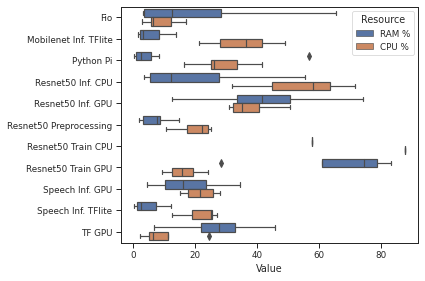

In [39]:
g = sns.boxplot(data=resources_df, x='Value',y='Function',hue='Resource')
g.set_ylabel('')
plt.tight_layout()
plt.savefig('cpu-ram-usage.pdf')